In [2]:
import pandas as pd
import matplotlib
import mysql.connector as mysql
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np
import googlemaps
import folium
import tqdm

# import koreanize_matplotlib


In [4]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [10]:
cursor = remote.cursor(buffered=True)
cursor.execute("""
                SELECT foundation, round(AVG(income)) as 매출 FROM company_info
                WHERE foundation > 0 AND income > 1000
                GROUP BY foundation
                ORDER BY foundation
""")

result = cursor.fetchall()

df = pd.DataFrame(result)

df.head()

,0,1
0,1983,322000
1,1995,1141000
2,1998,488500
3,1999,2266000
4,2000,1661987


In [39]:
df.columns = ["설립일", "평균매출"]

df

,설립일,평균매출
0,1983,322000
1,1995,1141000
2,1998,488500
3,1999,2266000
4,2000,1661987
5,2001,367333
6,2002,359000
7,2003,1468500
8,2004,609500
9,2005,266333


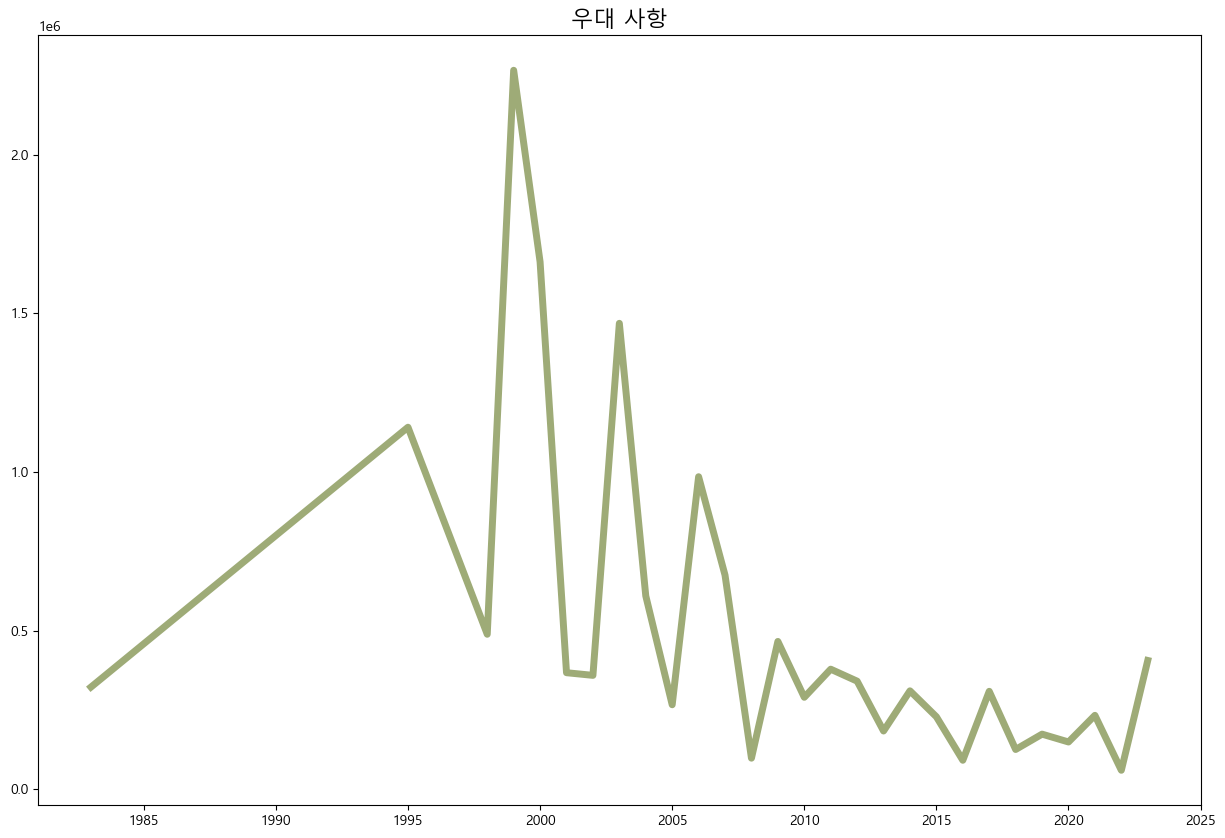

In [18]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')

# 색상 리스트
colors = [
    "#163F98", "#B373A0", "#40AF97", "#070B46", "#665A0A", "#3C322A",
    "#B8CEF5", "#BB5006", "#ACBC5F", "#4909AA", "#BFB783", "#9EAB77",
    "#A4FB99", "#C23805", "#F399F4", "#3D3046", "#3C9E8B", "#7F07E3"
]

# 그래프 크기 설정
plt.figure(figsize=(15, 10))

# 막대 그래프
# plt.bar(df["기술스택"], df["수"], color=colors[:len(df)], label="수")

# 꺾은선 그래프 추가
plt.plot(df["설립일"], df["매출"], color="#9EAB77", linestyle="-", linewidth=5, label="꺾은선 그래프")

# 제목 및 축 레이블
plt.title("우대 사항", fontsize=16)

# 범례 추가
# plt.legend()

# 그래프 표시
plt.show()


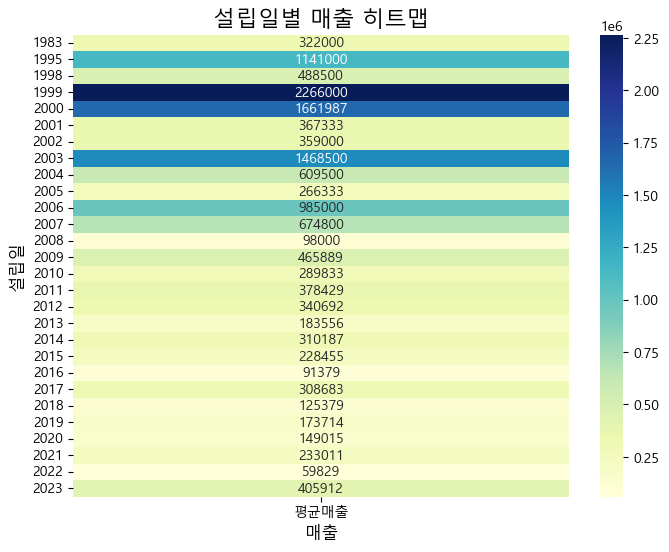

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵용 데이터 준비
heatmap_data = df.pivot_table(index="설립일", values="평균매출", aggfunc="sum")

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("설립일별 매출 히트맵", fontsize=16)
plt.xlabel("매출", fontsize=12)
plt.ylabel("설립일", fontsize=12)
plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   설립일     28 non-null     int64 
 1   매출      28 non-null     object
dtypes: int64(1), object(1)
memory usage: 580.0+ bytes


In [24]:
df["매출"] = df["매출"].astype(int)

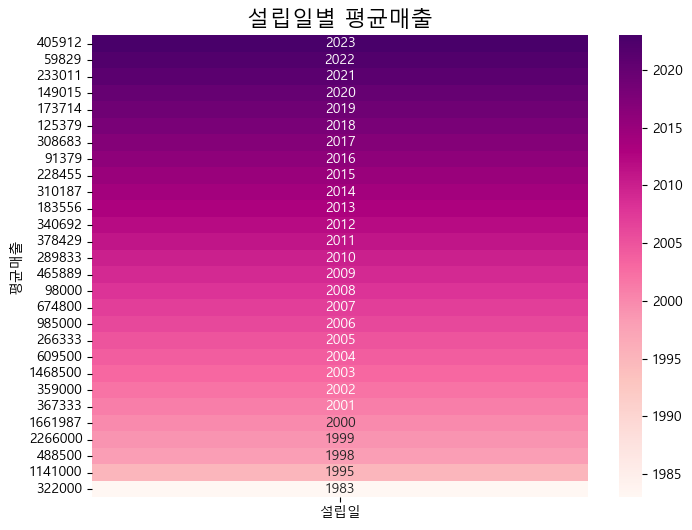

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵용 데이터 준비
heatmap_data = df.pivot_table(index="평균매출", values="설립일", aggfunc="sum")

heatmap_data = heatmap_data.sort_values(by="설립일", ascending=False)

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="RdPu", cbar=True)
plt.title("설립일별 평균매출", fontsize=16)
plt.show()


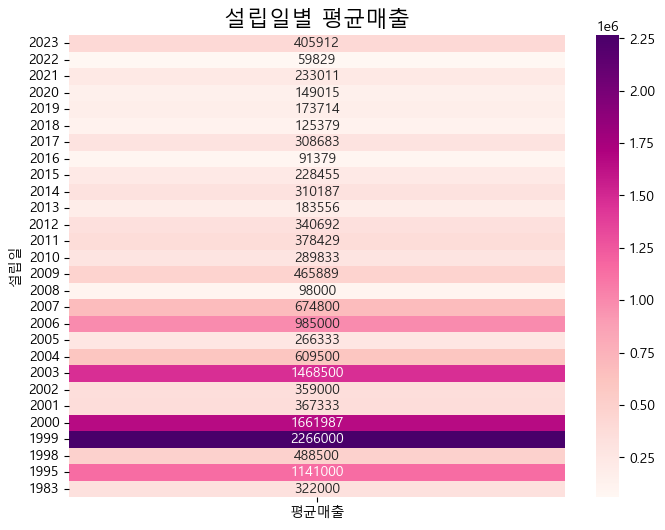

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵용 데이터 준비
heatmap_data = df.pivot_table(index="설립일", values="평균매출", aggfunc="sum")

heatmap_data = heatmap_data.sort_index(ascending=False)

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="RdPu", cbar=True)
plt.title("설립일별 평균매출", fontsize=16)
plt.show()


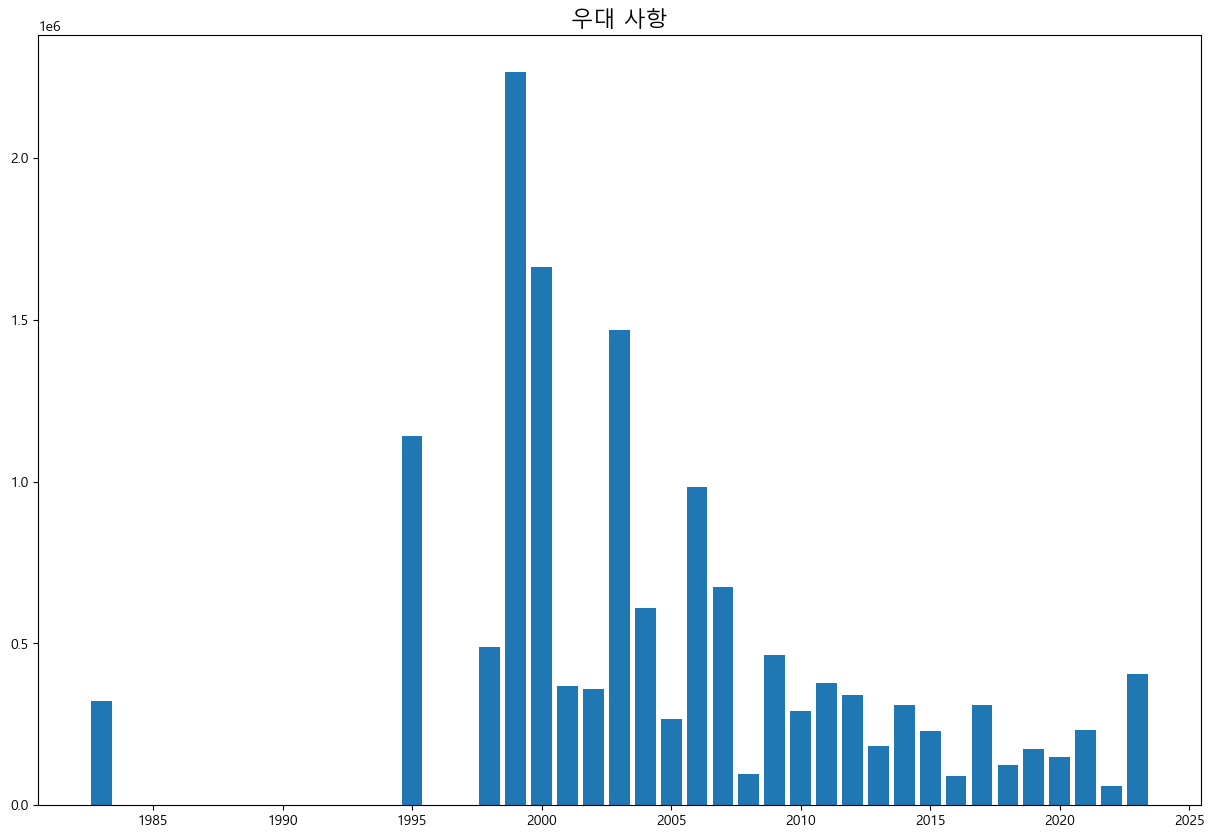

In [32]:

rc('font', family='Malgun Gothic')# 한글

plt.figure(figsize=(15, 10))
plt.bar(df["설립일"], df["매출"])

plt.title("우대 사항", fontsize = 16)

plt.show()

C:\Users\NDY\AppData\Local\Temp\ipykernel_22284\391418152.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="설립일", y="매출", data=df, ci=None, palette="Set3")  # ci=None으로 신뢰 구간 제거
C:\Users\NDY\AppData\Local\Temp\ipykernel_22284\391418152.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="설립일", y="매출", data=df, ci=None, palette="Set3")  # ci=None으로 신뢰 구간 제거


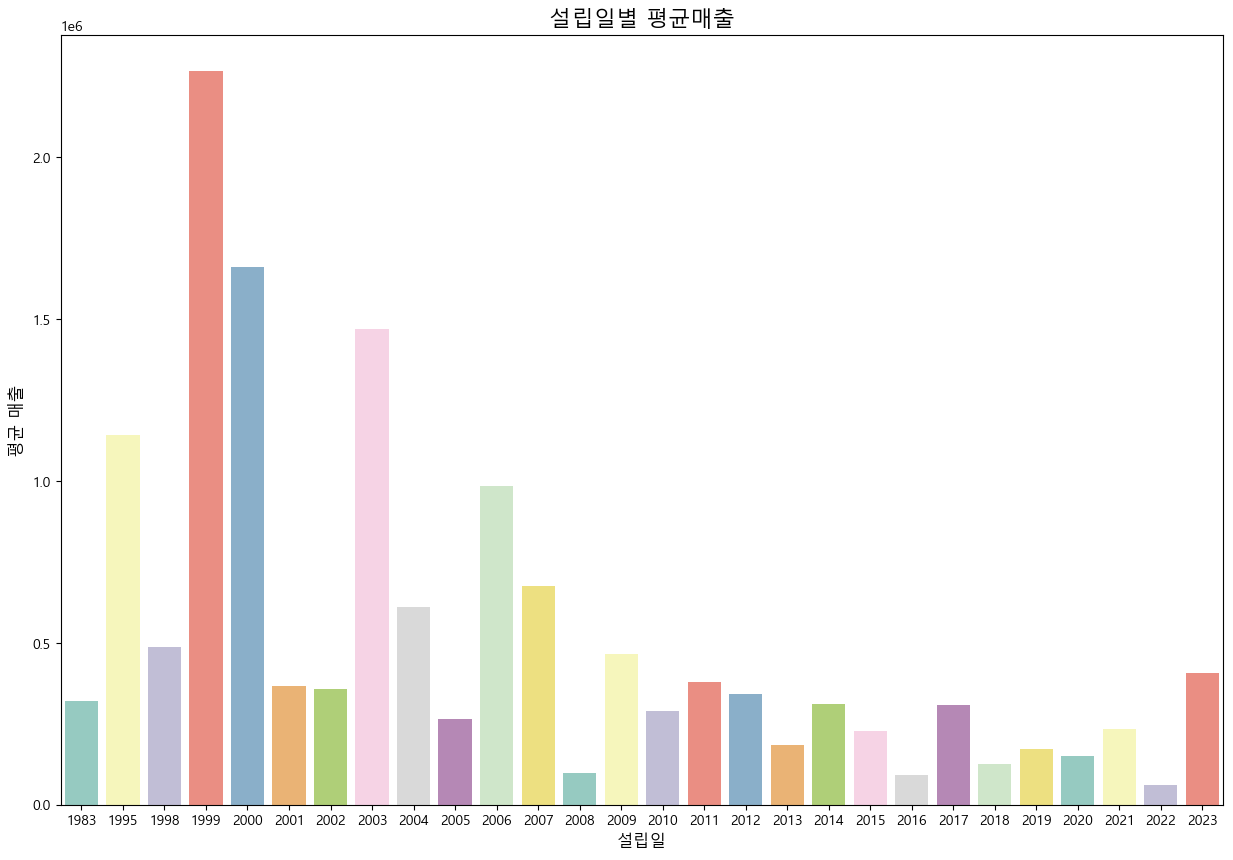

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')

# Seaborn 막대 그래프
plt.figure(figsize=(15, 10))
sns.barplot(x="설립일", y="매출", data=df, ci=None, palette="Set3")  # ci=None으로 신뢰 구간 제거

# 그래프 제목 및 레이블
plt.title("설립일별 평균매출", fontsize=16)
plt.xlabel("설립일", fontsize=12)
plt.ylabel("평균 매출", fontsize=12)

plt.show()


In [48]:
remote.close()